In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import qiskit
print("success")

success


In [10]:
from qiskit.visualization import  plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state 

In [11]:
# Loading IBM Quantum Account 
provider = qiskit.IBMQ.load_account()

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

### Teleportation Protocol

In [12]:
qr = qiskit.QuantumRegister(3, name='q')
crz = qiskit.ClassicalRegister(1, name ='crz')
crx = qiskit.ClassicalRegister(1, name ='crx')

In [13]:
teleportation_circuit = qiskit.QuantumCircuit(qr,crz, crx)

In [14]:
# Create Bell Pair 
def create_bell_pair(qc,a,b):
    '''qc -> Quantum circuit
        a -> index of qubit
        b -> index of qubit
        crete bell pair between ath and bth qubits'''
    qc.h(a) # Creating Hadamard Gate on ath qubits
    qc.cx(a,b) # create controlled not on b respect to a 

In [15]:
create_bell_pair(teleportation_circuit,1,2)
teleportation_circuit.draw(style='mpl')


q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

In [16]:
def create_sender_gate(qc, a,b):
    '''qc -> Quantum circuit
        a -> index of qubit
        b -> index of qubit
        crete reverse bell pair to decode message'''
    qc.cx(a,b)
    qc.h(a)

In [17]:
teleportation_circuit.barrier()
create_sender_gate(teleportation_circuit,0,1)
teleportation_circuit.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

In [ ]:
def sender_measure_and_send(qc,a,b):
    '''qc -> Quantum circuit
        a -> index of qubit
        b -> index of qubit
        measure a and b and store 0 and 1 classical registe '''
    # qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

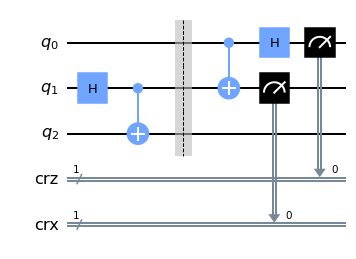

In [ ]:
sender_measure_and_send(teleportation_circuit,0,1)
teleportation_circuit.draw()

In [ ]:
def reciver_side_gate(qc,qubit,crz,crx):
    ''' qc - > quantum circuit 
        crz , crx ->  two clasical register to control Z and Y gate 
        change state of qubit respect to crz and crx '''
    qc.x(qubit).c_if(crx,1) # c_if is control statement respect to clasical bit 
    qc.z(qubit).c_if(crz,1)
    
    

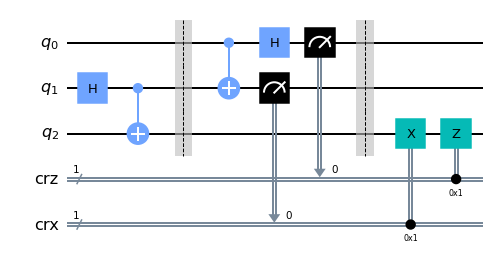

In [ ]:
teleportation_circuit.barrier()
reciver_side_gate(teleportation_circuit, 2, crz,crx)
teleportation_circuit.draw()


### Random State  Init

numpy.ndarray

<IPython.core.display.Latex object>

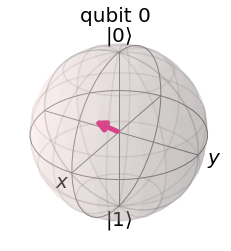

In [ ]:
psi = random_state(1)
display(type(psi))
display(array_to_latex(psi, prefix = "|\\psi\\rangle = "))
plot_bloch_multivector(psi)

In [ ]:
init_qubit  = Initialize(psi) # Initialize is an operator class give an quantum operator that initialize the state of qubit as given state 
init_qubit.label="init state"
init_qubit

Instruction(name='initialize', num_qubits=1, num_clbits=0, params=[(-0.7736699848319032-0.4405924520870911j), (-0.3523617361087899-0.28836479095147305j)])

### Quantum Teleportation Circuit 

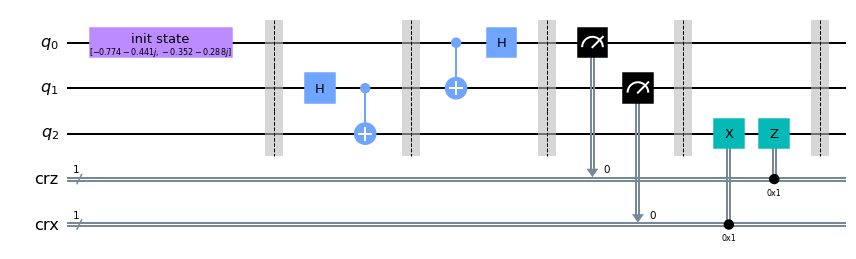

In [ ]:
# Creating Register and circuit 
qr = qiskit.QuantumRegister(3, name='q')
crz = qiskit.ClassicalRegister(1, name ='crz')
crx = qiskit.ClassicalRegister(1, name ='crx')

# Define Circuit
qc = qiskit.QuantumCircuit(qr,crz,crx)

# STEP 0 : Initialize the sender information with random state 
qc.append(init_qubit,[0])
qc.barrier()

# STEP 1 : creating Bell Pair
create_bell_pair(qc, 1,2)
qc.barrier()

# STEP 2: creating sending q0 bit 
create_sender_gate(qc,0,1)
qc.barrier()

# STEP 3: Measure and send clasical bit
sender_measure_and_send(qc,0,1)
qc.barrier()

# STEP 4: Reciving quantum information 
reciver_side_gate(qc,2,crz,crx)
qc.barrier()



qc.draw()



### Test and Run The Circuit

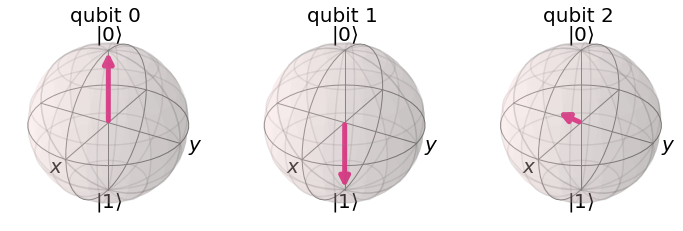

In [ ]:
sim = qiskit.Aer.get_backend('aer_simulator')
qc.save_statevector()
result = sim.run(qc).result()
out_vector = result.get_statevector()
plot_bloch_multivector(out_vector)

In [ ]:
type(out_vector)

['_ATOL_DEFAULT',
 '_MAX_TOL',
 '_RTOL_DEFAULT',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_abc_impl',
 '_add',
 '_data',
 '_evolve_instruction',
 '_evolve_operator',
 '_expectation_value_pauli',
 '_index_to_ket_array',
 '_ipython_display_',
 '_matrix_to_dict',
 '_multiply',
 '_op_shape',
 '_rng',
 '_rng_generator',
 '_subsystem_probabilities',
 '_vector_to_dict',
 'atol',
 'conjugate',
 'copy',
 'dat

In [ ]:
out_vector.to_dict()

{'010': (-0.7736699848319031-0.440592452087091j),
 '110': (-0.3523617361087899-0.28836479095147294j)}

In [ ]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_experiment',
 '_metadata',
 'backend_name',
 'backend_version',
 'data',
 'date',
 'from_dict',
 'get_counts',
 'get_memory',
 'get_statevector',
 'get_unitary',
 'header',
 'job_id',
 'qobj_id',
 'results',
 'status',
 'success',
 'to_dict']

In [ ]:
result.results


[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 249, '0x0': 242, '0x2': 272, '0x3': 261}, statevector=Statevector([ 0.        -0.j        ,  0.        +0.j        ,
              -0.77366998-0.44059245j,  0.        +0.j        ,
               0.        -0.j        ,  0.        +0.j        ,
              -0.35236174-0.28836479j,  0.        +0.j        ],
             dims=(2, 2, 2))), header=QobjExperimentHeader(clbit_labels=[['crz', 0], ['crx', 0]], creg_sizes=[['crz', 1], ['crx', 1]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=3, name='circuit-92', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=1715156002, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': False, 'parallel_shots': 8, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'num_clbits': 2, 'parallel_state_update': 1, 'num_qubits': 3, 'device': 'CPU', 'input_qubit_map'